In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

In [3]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000019F15714290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019F1582FB30>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
from typing_extensions import TypedDict
class state(TypedDict):
    graph_state:str



In [5]:
def first_node(state):
    print("i am in first node")
    return {"graph_state":state["graph_state"]+" i am playing"}
def second_node(state):
    print("i am in second node")
    return {"graph_state":state["graph_state"]+" cricket"}
def third_node(state):
    print("i am in first node")
    return {"graph_state":state["graph_state"]+"Badminton"}




In [6]:
import random
from typing import Literal
def dcide_play(state)->Literal["second_node","third_node"]:
    graph_state=state['graph_state']

    if random.random()<0.5:
        return "second_node"
    return "third_node"

In [7]:
from langgraph.graph import StateGraph , START,END
graph=StateGraph(state)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)

graph.add_edge(START,'first_node')
graph.add_conditional_edges("first_node",dcide_play)
graph.add_edge('second_node',END)
graph.add_edge('third_node',END)


workflow=graph.compile()


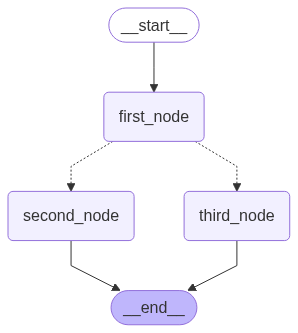

In [8]:
workflow

In [9]:
# workflow.invoke({"graph_state":"hii i am somu"})

In [10]:
from typing import Annotated
from langgraph.graph.message import add_messages


In [21]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [32]:
graph1=StateGraph(State)

In [33]:
def chatbot2(state:State):
    return{'messages':[llm.invoke(state['messages'])]}


In [34]:
graph1.add_node('chatbot1',chatbot2)
graph1.add_edge(START,'chatbot1')
graph1.add_edge('chatbot1',END)
workflow=graph1.compile()

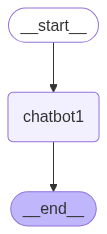

In [35]:
workflow

In [38]:
workflow.stream({'messages':'my name is somu'})

<generator object Pregel.stream at 0x0000019F169F49A0>